# Score prediction


In [ ]:
# !pip install tensorflow-gpu

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.10.0'

In [3]:
# In colab
# from google.colab import drive
# drive.mount('/content/drive')

## Setting Data
* 데이터를 불러와봅시다.

In [21]:
xy = np.loadtxt("data-01-test-score.csv",  #Set data path
                delimiter=',',
                dtype=np.float32)
print(xy)

x_train = xy[:, 0:-1]  # 모든 row를 가져오로 마지막 컬럼빼고
y_train = xy[:, [-1]]  # 모든 row 가져오고 마지막 컬럼빼고

print(x_train.shape, y_train.shape)


[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
(25, 3) (25, 1)


## make a dataset

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))  # 한번에불러오는 량
dataset = dataset.batch(batch_size=len(x_train))  # 메모리리 batch_size만큼 가져옴 int형 일종의 제너레이터

# 분산데이타 처리 가능
# tensro_slices : 텐서를 슬라이스로 만들어하나씩 가져옴

In [23]:
for x, y in dataset:
    print(x, y)
    break

tf.Tensor(
[[[ 73.  80.  75.]
  [ 93.  88.  93.]
  [ 89.  91.  90.]
  [ 96.  98. 100.]
  [ 73.  66.  70.]
  [ 53.  46.  55.]
  [ 69.  74.  77.]
  [ 47.  56.  60.]
  [ 87.  79.  90.]
  [ 79.  70.  88.]
  [ 69.  70.  73.]
  [ 70.  65.  74.]
  [ 93.  95.  91.]
  [ 79.  80.  73.]
  [ 70.  73.  78.]
  [ 93.  89.  96.]
  [ 78.  75.  68.]
  [ 81.  90.  93.]
  [ 88.  92.  86.]
  [ 78.  83.  77.]
  [ 82.  86.  90.]
  [ 86.  82.  89.]
  [ 78.  83.  85.]
  [ 76.  83.  71.]
  [ 96.  93.  95.]]], shape=(1, 25, 3), dtype=float32) tf.Tensor(
[[[152.]
  [185.]
  [180.]
  [196.]
  [142.]
  [101.]
  [149.]
  [115.]
  [175.]
  [164.]
  [141.]
  [141.]
  [184.]
  [152.]
  [148.]
  [192.]
  [147.]
  [183.]
  [177.]
  [159.]
  [177.]
  [175.]
  [175.]
  [149.]
  [192.]]], shape=(1, 25, 1), dtype=float32)


# 가설 설정

In [24]:
W = tf.Variable(tf.random.normal([1, 3], 0, 1), name='weight')
b = tf.Variable(tf.random.normal([1], 0, 1), name='bias')
#tf.keras.layers.Dense(1) 동일

tf.print(W, b)
print(x_train)
tf.transpose(x_train)

[[-1.35441589 0.704549313 0.0366619118]] [-1.35441589]
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


<tf.Tensor: shape=(3, 25), dtype=float32, numpy=
array([[ 73.,  93.,  89.,  96.,  73.,  53.,  69.,  47.,  87.,  79.,  69.,
         70.,  93.,  79.,  70.,  93.,  78.,  81.,  88.,  78.,  82.,  86.,
         78.,  76.,  96.],
       [ 80.,  88.,  91.,  98.,  66.,  46.,  74.,  56.,  79.,  70.,  70.,
         65.,  95.,  80.,  73.,  89.,  75.,  90.,  92.,  83.,  86.,  82.,
         83.,  83.,  93.],
       [ 75.,  93.,  90., 100.,  70.,  55.,  77.,  60.,  90.,  88.,  73.,
         74.,  91.,  73.,  78.,  96.,  68.,  93.,  86.,  77.,  90.,  89.,
         85.,  71.,  95.]], dtype=float32)>

In [25]:
def linear_regression(features):
    hypothesis = tf.matmul(features, W, transpose_b=True) + b
    return hypothesis


print(linear_regression(x_train))

tf.Tensor(
[[-41.11319 ]
 [-61.905197]
 [-54.48387 ]
 [-58.66632 ]
 [-51.160187]
 [-38.712784]
 [-39.849495]
 [-23.357487]
 [-60.22963 ]
 [-55.80857 ]
 [-42.814342]
 [-47.654842]
 [-57.046677]
 [-49.313007]
 [-41.8718  ]
 [-61.09066 ]
 [-51.664646]
 [-44.24311 ]
 [-52.571556]
 [-45.698296]
 [-48.525707]
 [-56.79823 ]
 [-45.405   ]
 [-43.209435]
 [-62.372375]], shape=(25, 1), dtype=float32)


# cost 함수 설정


$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [26]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost


optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001)

# 학습

In [30]:
epochs = 5000

for step in range(epochs):
    for features, labels in dataset:
        with tf.GradientTape() as tape:  # 미분을 위한 준비단계 기록
            pred = linear_regression(features)
            loss_value = loss_fn(pred, labels)
        # 여기까지는 반드시 탭으로 들어가야하고

        #여기서부터는 상관없음
        grads = tape.gradient(loss_value, [W, b])  # 업데이트 할 파라미터, 실제 미분에 tape객체를 활용
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 7.2605
Iter: 100, Loss: 7.1880
Iter: 200, Loss: 7.1196
Iter: 300, Loss: 7.0550
Iter: 400, Loss: 6.9940
Iter: 500, Loss: 6.9365
Iter: 600, Loss: 6.8821
Iter: 700, Loss: 6.8308
Iter: 800, Loss: 6.7823
Iter: 900, Loss: 6.7364
Iter: 1000, Loss: 6.6931
Iter: 1100, Loss: 6.6522
Iter: 1200, Loss: 6.6135
Iter: 1300, Loss: 6.5768
Iter: 1400, Loss: 6.5422
Iter: 1500, Loss: 6.5094
Iter: 1600, Loss: 6.4784
Iter: 1700, Loss: 6.4490
Iter: 1800, Loss: 6.4213
Iter: 1900, Loss: 6.3950
Iter: 2000, Loss: 6.3700
Iter: 2100, Loss: 6.3464
Iter: 2200, Loss: 6.3241
Iter: 2300, Loss: 6.3029
Iter: 2400, Loss: 6.2829
Iter: 2500, Loss: 6.2639
Iter: 2600, Loss: 6.2458
Iter: 2700, Loss: 6.2288
Iter: 2800, Loss: 6.2126
Iter: 2900, Loss: 6.1972
Iter: 3000, Loss: 6.1827
Iter: 3100, Loss: 6.1689
Iter: 3200, Loss: 6.1558
Iter: 3300, Loss: 6.1434
Iter: 3400, Loss: 6.1316
Iter: 3500, Loss: 6.1204
Iter: 3600, Loss: 6.1098
Iter: 3700, Loss: 6.0997
Iter: 3800, Loss: 6.0902
Iter: 3900, Loss: 6.0811
Iter: 4000, 

In [32]:
print(W, b)

<tf.Variable 'weight:0' shape=(1, 3) dtype=float32, numpy=array([[0.28451478, 0.57907796, 1.1652458 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.3558369], dtype=float32)>


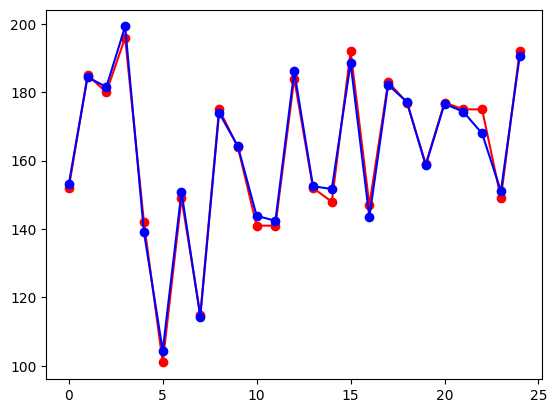

In [33]:

hypothesis = linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()